In [12]:
# https://www.youtube.com/watch?v=aPCZcv-5qfA
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# currently: 0, 0
circuit.x(0) # not. Flips qubit value
# 1, 0
circuit.cx(0, 1) # cnot, controlled not. Flips 2nd qubit value IF 1st qubit is 1
# 1, 1
circuit.measure([0, 1], [0, 1])
circuit.draw()

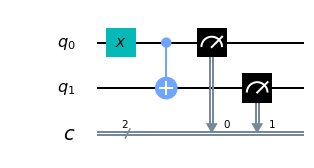

In [17]:
circuit.draw(output="mpl")

In [13]:
from qiskit import IBMQ

IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 1 queued and 5 qubits
ibmq_16_melbourne has 0 queued and 14 qubits
ibmq_vigo has 2 queued and 5 qubits
ibmq_ourense has 4 queued and 5 qubits
ibmq_london has 16 queued and 5 qubits
ibmq_burlington has 1 queued and 5 qubits
ibmq_essex has 2 queued and 5 qubits


In [21]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmqx2")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


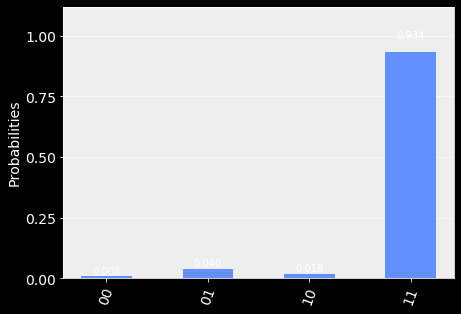

In [22]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [30]:
backend = provider.get_backend("ibmq_qasm_simulator")

circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# currently: 0, 0
circuit.h(0) # hadamard gate. Puts the qubit in superposition
# 0, 0 | 1, 0
circuit.cx(0, 1) # cnot, controlled not. Flips 2nd qubit value IF 1st qubit is 1
# 0, 0 | 1, 1
circuit.measure([0, 1], [0, 1])
circuit.draw()

In [32]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


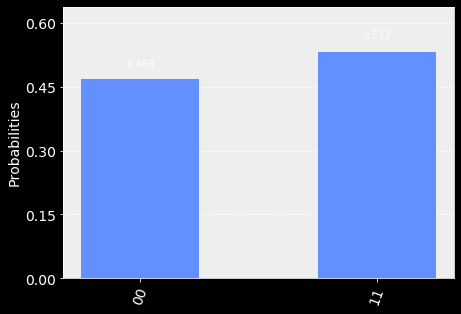

In [33]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [35]:
from qiskit import Aer # simulator framework for qiskit

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator


In [39]:
sim_backend = Aer.get_backend("qasm_simulator")

job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


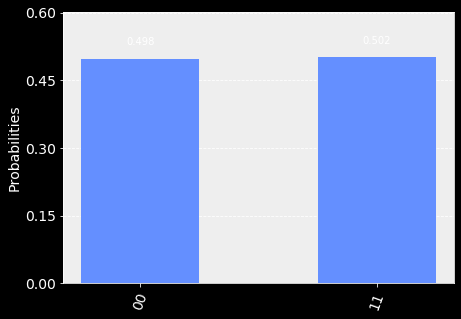

In [40]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])